In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
df=pd.read_csv('titanicwork.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#1 checking for missing value 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# replacing missing values with the median
df['Age']=df['Age'].fillna(df['Age'].median())
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
# Droping columns with irelevant data
df.drop(columns=["Cabin", "Ticket", "PassengerId"], inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [7]:
# creating a new column called familysize to replace SibSp Parch
df['familysize']=df['SibSp']+df['Parch']+1
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,familysize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S,4
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1


In [8]:
# droping Parch and  SibSp replaced by famillysize
df.drop(columns=["SibSp","Parch"], inplace=True)
df

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,familysize
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,1
...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,S,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,S,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,23.4500,S,4
889,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,C,1


In [9]:
# CHECKING FOR DUPLICATE 
duplicate_rows = df[df.duplicated()]
print(duplicate_rows.head(10))

Empty DataFrame
Columns: [Survived, Pclass, Name, Sex, Age, Fare, Embarked, familysize]
Index: []


<Axes: >

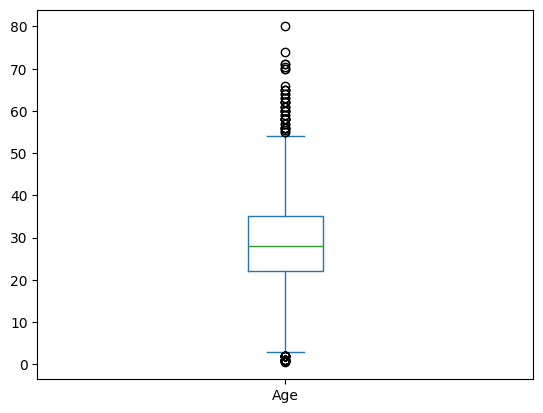

In [10]:
# Box plot for age column to check for outliers inthe column
df['Age'].plot.box()

Text(0, 0.5, 'Fare')

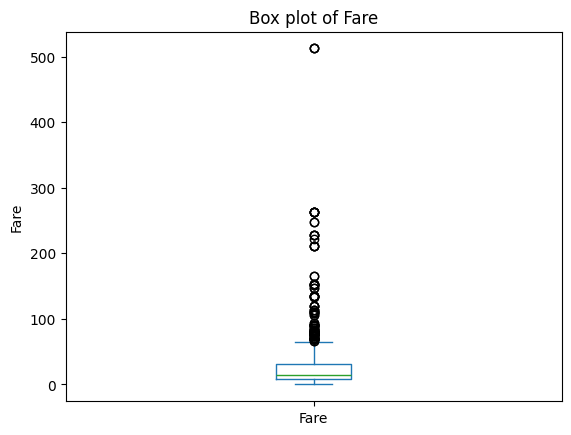

In [11]:
# Box plot for the fare column tocheck for outliers in the column
df['Fare'].plot.box()
plt.title('Box plot of Fare')
plt.ylabel('Fare')

In [12]:
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
df

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\THE EYE INFORMATIQUE\AppData\Local\Temp\ipykernel_492\4139711033.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)


,Survived,Pclass,Name,Sex,Age,Fare,Embarked,familysize,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,2,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,2,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,2,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,1,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,S,1,Rev
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,S,1,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,23.4500,S,4,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,C,1,Mr


<function matplotlib.pyplot.show(close=None, block=None)>

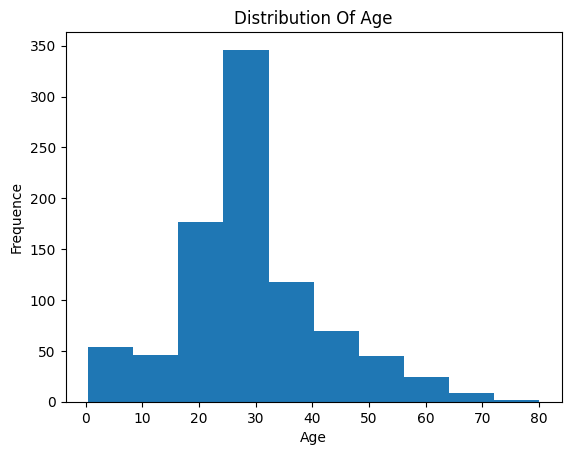

In [13]:
# fiding the distribution of the Age column
df['Age'].plot.hist()
plt.title('Distribution Of Age')
plt.xlabel('Age')
plt.ylabel('Frequence')
plt.show

In [14]:
#
survived=df[df['Survived']==1]
notsurvived=df[df['Survived']==0]

In [15]:
survival_rate=df.groupby('Pclass')['Survived'].mean()
survival_rate

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Text(0.5, 1.0, 'survival_rate againts Passenger_class')

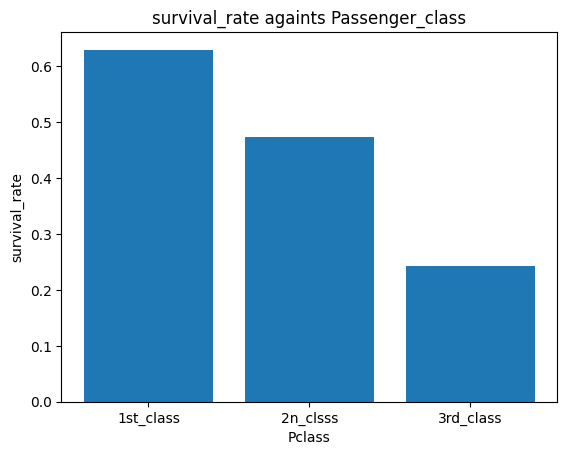

In [16]:
plt.bar(survival_rate.index,survival_rate.values)
plt.xticks(survival_rate.index, labels=('1st_class','2n_clsss', '3rd_class'))
plt.ylabel('survival_rate')
plt.xlabel('Pclass')
plt.title('survival_rate againts Passenger_class')

In [17]:
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)
df

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,familysize,Title,AgeGroup
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,2,Mr,21-40
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,2,Mrs,21-40
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1,Miss,21-40
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,2,Mrs,21-40
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,1,Mr,21-40
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,S,1,Rev,21-40
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,S,1,Miss,0-20
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,23.4500,S,4,Miss,21-40
889,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,C,1,Mr,21-40


In [18]:
survival_rate=df.groupby('AgeGroup')['Survived'].mean()
survival_rate

C:\Users\THE EYE INFORMATIQUE\AppData\Local\Temp\ipykernel_492\520612676.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate=df.groupby('AgeGroup')['Survived'].mean()


AgeGroup
0-20      0.458101
21-40     0.364769
41-60     0.390625
61-80     0.227273
81-100         NaN
Name: Survived, dtype: float64

Text(0.5, 0, 'AgeGroup')

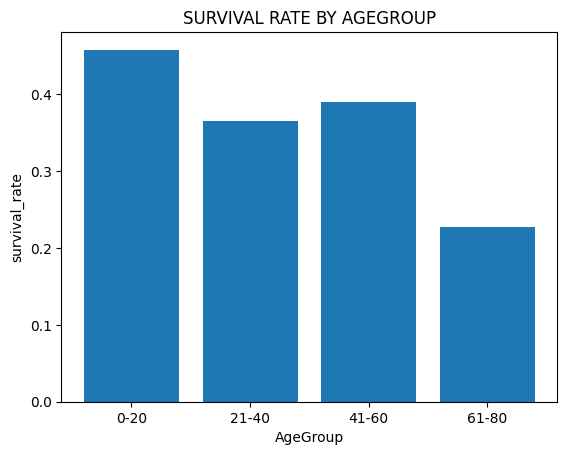

In [19]:
plt.bar(survival_rate.index, survival_rate.values)
plt.title('SURVIVAL RATE BY AGEGROUP')
plt.ylabel('survival_rate')
plt.xlabel('AgeGroup')

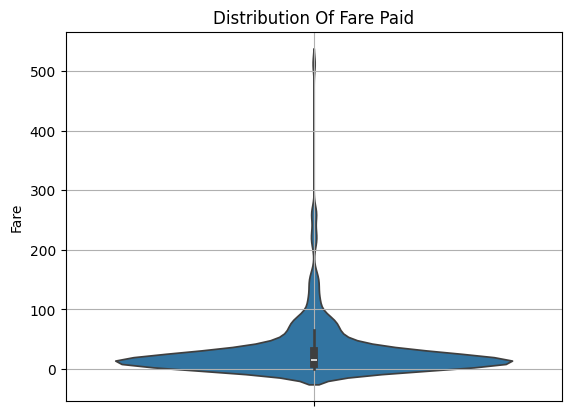

In [20]:
sns.violinplot(df['Fare'])
plt.title('Distribution Of Fare Paid')
plt.grid(True)

In [21]:
#how survival rate varies by tile and sex 


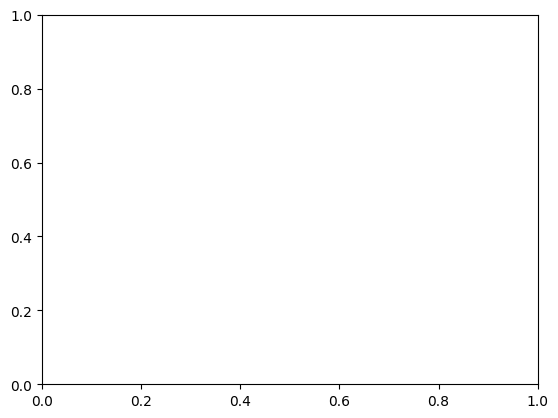

In [22]:
#Boxplot of how gender affect survival rate
sns.boxplot(gender=survival_rate)

plt.show()

In [23]:
overallsurvival_rate =df['Survived'].mean()*100
overallsurvival_rate

38.38383838383838

In [24]:
gender_survival =df.groupby('Sex')['Survived'].mean()
print('Survival Rate by Gender:')
print(gender_survival)

Survival Rate by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


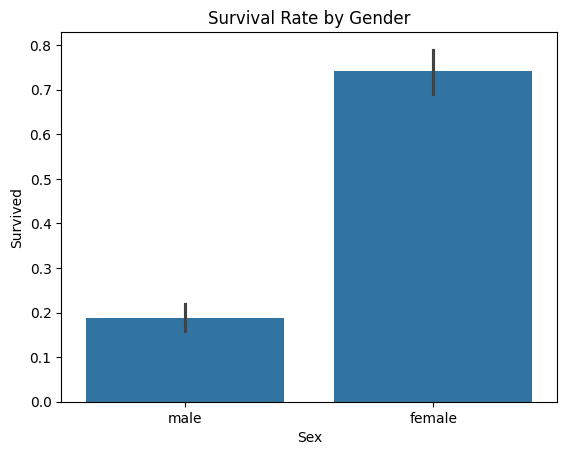

In [25]:

sns.barplot(x='Sex', y='Survived',data=df)
            
plt.title('Survival Rate by Gender')
plt.show()

In [26]:
class_Survival =df.groupby('Pclass')['Survived'].mean()
print('\nSurvival Rate by Passenger Class:')
print(class_Survival)



Survival Rate by Passenger Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


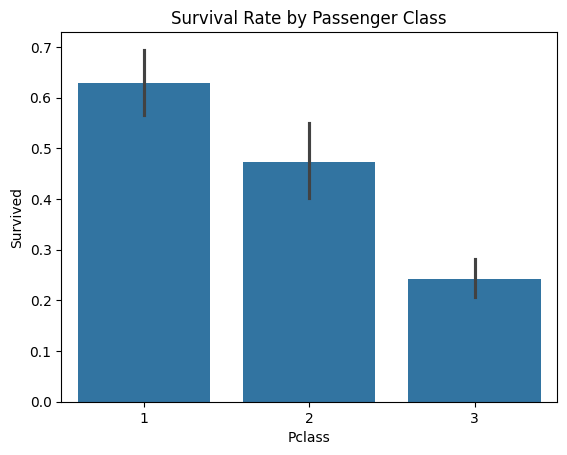

In [27]:
#Barplot of survival rate by passenger class
sns.barplot(x='Pclass',y='Survived',data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

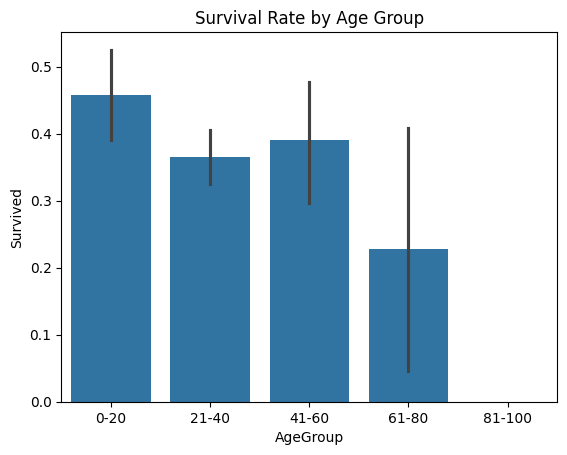

In [28]:
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title('Survival Rate by Age Group')
plt.show

In [29]:
#checking patterns or trends in survival rates based on passenger class or age group.


In [30]:
embark_survival =df.groupby('Embarked')['Survived'].mean()
print('\nSurvival Rate by Embarkation Port:')
print(embark_survival)


Survival Rate by Embarkation Port:
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


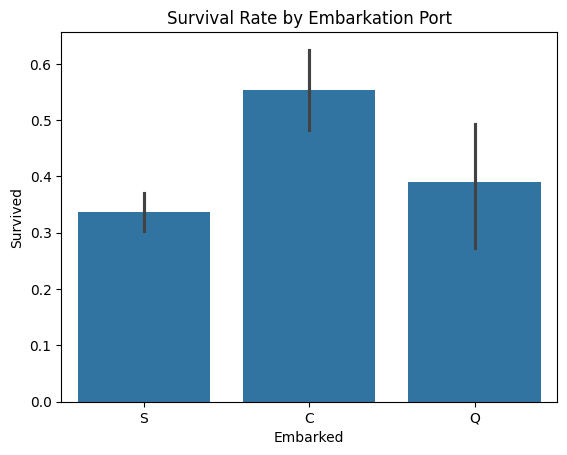

In [31]:
#bar plot for survival rate by embarktion port 
sns.barplot(x='Embarked', y= 'Survived', data=df)
plt.title('Survival Rate by Embarkation Port')
plt.show()

In [33]:
#Relationship betwwen title,gender,and survival rate

df['Title'] =df['Name'].str.extract('([A-Za-z]+)\.')
title_gender_survival =df.groupby(['Title','Sex'])['Survived'].mean()
print('\nSurvival Rate by Title and Gender:')
print(title_gender_survival)


Survival Rate by Title and Gender:
Title     Sex   
Capt      male      0.000000
Col       male      0.500000
Countess  female    1.000000
Don       male      0.000000
Dr        female    1.000000
          male      0.333333
Jonkheer  male      0.000000
Lady      female    1.000000
Major     male      0.500000
Master    male      0.575000
Miss      female    0.697802
Mlle      female    1.000000
Mme       female    1.000000
Mr        male      0.156673
Mrs       female    0.792000
Ms        female    1.000000
Rev       male      0.000000
Sir       male      1.000000
Name: Survived, dtype: float64


<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
C:\Users\THE EYE INFORMATIQUE\AppData\Local\Temp\ipykernel_492\2377096739.py:3: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] =df['Name'].str.extract('([A-Za-z]+)\.')


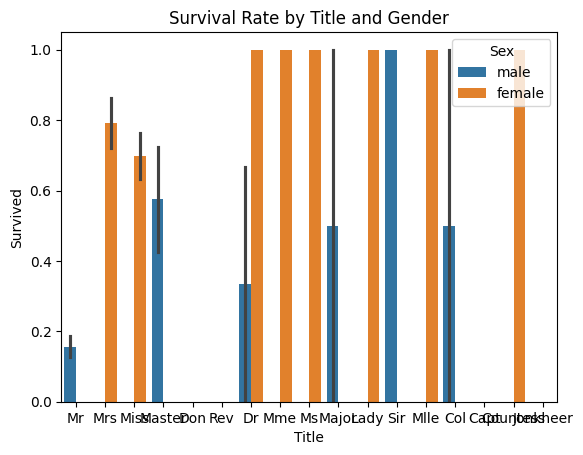

In [34]:
#barplot of survival rate by title and gender.
sns.barplot(x='Title', y='Survived', hue ='Sex', data=df)
plt.title('Survival Rate by Title and Gender')
plt.show()

In [40]:
df['Familysize']=df['Sibsp']+df['Parch']+1
family_survival =df.groupby('FamilySize')['Survived'].mean()
print('\nSurvival Rate by Family Size:')
print(family_survival)

KeyError: 'Sibsp'

In [38]:
#barplot of survival rate by family size
sns.barplot(x='FamilySize', y='Survived, data=df')
plt.title('Survival Rate by Family Size')
plt.show()

ValueError: Could not interpret value `FamilySize` for `x`. Value is a string, but `data` was not passed.